In [2]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5678)

[0.26456039 0.89367243 0.55275402 0.4121718  0.28307214 0.742975
 0.92637458 0.84958204 0.50339065 0.10423391]


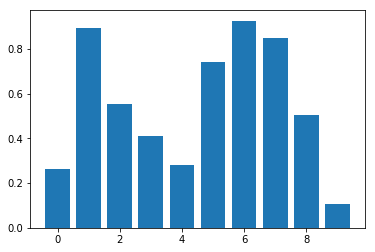

In [9]:
# declare some 
expected_action_value =  np.random.uniform(0 ,1 , 10)
print(expected_action_value)
plt.bar(range(10),expected_action_value)
plt.show()

In [26]:
# basic
estimated_action_value = np.zeros(10)


def reward_function1(action_taken, expected_action_value):
    if np.random.uniform(0, 1) <= expected_action_value[action_taken]: return 1
    return 0

def reward_function(action_taken, expected_action_value):
    if np.random.uniform(0, 1) <= expected_action_value[action_taken]: return 1
    return -1

def multi_arm_bandit_problem(arms = 10, steps = 1000, e = 0.1, expected_action_value = []):
    overall_reward, optimal_action = [], []
    estimate_action_value = np.zeros(arms)
    count = np.zeros(arms)
    for s in range(0, steps):
        e_estimator = np.random.uniform(0, 1)
        action = np.argmax(estimate_action_value) if e_estimator > e else np.random.choice(np.arange(10))
        reward = reward_function(action, expected_action_value)
        estimate_action_value[action] = estimate_action_value[action] + (1/(count[action]+1)) * (reward - estimate_action_value[action])
        overall_reward.append(reward)
        optimal_action.append(action == np.argmax(expected_action_value))
        count[action] += 1
    return(overall_reward, optimal_action)

def run_game(runs = 100, steps = 1000, arms = 10):
    rewards = np.zeros((runs, steps))
    optimal_actions = np.zeros((runs, steps))
    expected_action_value = np.random.uniform(0, 1 , arms)
    for run in range(0, runs):
        rewards[run][:], optimal_actions[run][:] = multi_arm_bandit_problem(arms = arms, steps = steps, e = epsilon_values[e_step], expected_action_value = expected_action_value)
    rewards_avg = np.average(rewards, axis = 1)
    optimal_action_perc = np.average(optimal_actions, axis = 1)
    return (rewards_avg, optimal_action_perc)

In [27]:
epsilon_values  = [0,0.25,0.5,0.75,1.0]
all_rewards_avg = []
all_optimal_action_perc = []

for e_step in range(4):
    rewards_avg, optimal_action_perc = run_game()
    all_rewards_avg.append()
    print(rewards_avg,optimal_action_perc)

[ 0.026  0.45  -0.01   0.41   0.446  0.44   0.462  0.464  0.456  0.456
  0.052  0.476  0.416  0.036  0.42   0.478  0.448  0.402  0.068  0.492
  0.464  0.078  0.06   0.476 -0.17   0.08  -0.23   0.392  0.444  0.484
  0.426  0.502 -0.118  0.468 -0.25  -0.028  0.42   0.454  0.452  0.438
  0.054  0.444  0.45   0.106  0.38   0.058  0.046  0.424  0.46   0.028
  0.448  0.444  0.058  0.4   -0.018 -0.108  0.022  0.484  0.438  0.482
  0.052  0.436  0.48   0.442  0.436  0.43   0.474  0.364  0.448  0.466
  0.454  0.484  0.06   0.062  0.078  0.054  0.43  -0.136  0.438  0.372
  0.436  0.42  -0.076  0.442  0.498  0.084  0.05   0.048  0.452  0.414
  0.104 -0.064  0.334  0.068  0.43  -0.126  0.476  0.462  0.42  -0.024] [0.001 0.977 0.001 0.895 0.984 0.987 0.988 0.98  0.99  0.978 0.    0.981
 0.96  0.    0.954 0.988 0.969 0.909 0.001 0.982 0.969 0.    0.    0.973
 0.003 0.    0.003 0.962 0.986 0.982 0.911 0.973 0.001 0.978 0.001 0.007
 0.98  0.961 0.981 0.983 0.    0.94  0.969 0.    0.834 0.001 0.    0.9

# Reference
1. Reinforcement Learning with Multi Arm Bandit – ITNEXT. (2018). ITNEXT. Retrieved 24 December 2018, from https://itnext.io/reinforcement-learning-with-multi-arm-bandit-decf442e02d2
2. matplotlib.pyplot.bar — Matplotlib 3.0.2 documentation. (2018). Matplotlib.org. Retrieved 24 December 2018, from https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html
3. 